<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Keras(BreastCancer%20Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
data = load_breast_cancer()

In [ ]:
feature = data['data']
target = data['target']

In [ ]:
# 표준화 하기
features = StandardScaler().fit_transform(feature)
# scaler = StandardScaler()
# z_cancer = scaler.fit_transform(feature)

In [ ]:
# 학습데이터 생성
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [ ]:
# 신경망 생성
x_input = Input(batch_shape = (None, 30))
h_layer = Dense(16, activation='relu')(x_input)
y_output = Dense(1, activation='sigmoid')(h_layer)
model = Model(x_input, y_output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습시작
hist = model.fit(x_train, y_train, epochs=500, validation_data = (x_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 14ms/step - loss: 0.6838 - val_loss: 0.5902
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5162 - val_loss: 0.4642
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4015 - val_loss: 0.3803
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 0.3203 - val_loss: 0.3249
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2647 - val_loss: 0.2854
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2244 - val_loss: 0.2565
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1932 - val_loss: 0.2363
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1705 - val_loss: 0.2203
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1512 - val_loss: 0.2088
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1360 - val_loss: 0.1999
Epoch 11

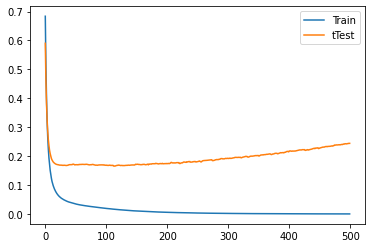

In [ ]:
# 그래프로 loss값 보기
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='tTest')
plt.legend()
plt.show()

In [ ]:
# predic 하기
y_pred = model.predict(x_test).reshape(-1)
# sigmoid를 썼기 때문에, y_pred < 0.5, 1, 0
y_pred = np.where(y_pred > 0.5, 1, 0)
acc = (y_pred == y_test).mean()
print("정확도: %0.3f" % acc)

정확도: 0.974
